In [1]:
import pandas as pd

# Dataset

In [2]:
df = pd.read_csv("all_attributes_487_42.csv")
# metadata = pd.read_csv("Metadata.csv")


In [3]:
df.index = df['Grid cell']
df.rename(columns={'revised_landuse_11210':'dis_dense_urban_m2', 'revised_landuse_11220':'dis_medium_dense_urban_m2', 'revised_landuse_12100':'industrial_commercial_m2', 'revised_landuse_11100':'continuous_urban_fabric_m2'}, inplace=True)

remove_list = ['id', 'Grid cell', 'Grid cell_count', 'geometry']
df.drop(columns=remove_list, inplace= True)
df.fillna(0, inplace= True)

df

,green_area_m2,city_level,neighborhood_level,trail,camera_surveillance,commercial_poi,public_poi,recreation_poi,housing_Owner,housing_Renter,...,dis_dense_urban_m2,dis_medium_dense_urban_m2,industrial_commercial_m2,X,Y,landuse_diversity,numbers_against_public_order,numbers_violent_crime,numbers_against_property,crime_incidents
Grid cell,,,,,,,,,,,,,,,,,,,,,
500mN6579500E534500,87263.047,293.540,4543.525,1051.469,0.0,0.0,2.0,1.0,48,3,...,109464.280,79694.801,0.000,534749.5,6579749.5,3,0.000000,0.0,0.0,0.000000
500mN6579500E535000,26675.069,28.188,3747.517,371.002,0.0,0.0,0.0,0.0,240,22,...,14387.668,187514.842,0.000,535249.5,6579749.5,3,3.500000,0.5,142.5,146.500000
500mN6579500E535500,34570.188,1033.767,3472.457,616.484,0.0,3.0,0.0,0.0,297,14,...,59009.091,113888.838,33783.671,535749.5,6579749.5,4,3.500000,0.5,142.5,146.500000
500mN6579500E536000,115311.402,0.000,1787.774,1831.268,0.0,0.0,0.0,0.0,53,7,...,1398.917,143772.389,11208.645,536249.5,6579749.5,4,0.000000,0.0,3.0,3.000000
500mN6580000E534500,33491.531,98.575,4174.573,153.976,0.0,0.0,0.0,0.0,77,0,...,205964.815,4315.367,0.000,534749.5,6580249.5,3,0.000000,0.0,1.5,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500mN6595500E547500,27650.308,104.907,4043.470,493.316,5.0,0.0,0.0,0.0,98,4,...,14492.996,142076.181,31790.412,547749.5,6595749.5,4,1.500000,0.0,4.0,5.500000
500mN6595500E548000,36382.453,114.518,2488.451,99.167,0.0,0.0,1.0,0.0,25,0,...,21438.300,122814.606,0.000,548249.5,6595749.5,4,0.666667,0.0,3.0,3.666667
500mN6604500E543000,239967.180,1823.540,0.000,743.245,0.0,0.0,0.0,0.0,5,3,...,0.000,0.000,0.000,543249.5,6604749.5,1,0.000000,0.0,0.0,0.000000


# Select some or all attributes as predictors

In [4]:
normalization = False

In [5]:
standardization = False

In [6]:
# Change the target here
target = "numbers_against_property"

# Four targets for prediction are available:
# "numbers_against_public_order"
# "numbers_violent_crime"
# "numbers_against_property"
# "crime_incidents"

In [7]:
target_list = [
    "numbers_against_public_order",
    "numbers_violent_crime",
    "numbers_against_property",
    "crime_incidents",
]

if target in target_list:
    target_list.remove(target)
    df_predictors = df.drop(columns=target_list)

predictors = df_predictors.columns.to_list()
predictors.remove(target)

In [8]:
predictor_x = predictors

In [9]:
from sklearn.model_selection import train_test_split

# Control for compatison
random_state = 2024

# Choose the target variable
y = df[target]
print(y.describe())

# Drop the target variable and the id column
x = df[predictor_x]

# Naming for later plotting use
y_name = y.name
x_columns = x.columns


# Normalization
if normalization is True:
    from sklearn.preprocessing import MinMaxScaler
    min_max_scaler = MinMaxScaler(feature_range=(0, 1))

    # for i in x.columns:
    x = min_max_scaler.fit_transform(x, y)
else:
    x = x.values


# Convert to numpy arrays for sklearn
y = y.values

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.4, random_state= random_state)

count     487.000000
mean       97.634497
std       250.637283
min         0.000000
25%         3.000000
50%        14.000000
75%        76.000000
max      3046.000000
Name: numbers_against_property, dtype: float64


# Tuning



### Random forest regression



#### Testing parameters of the model



In [10]:
# Tuning: max features

# from sklearn.ensemble import RandomForestRegressor

# ensemble_regs = [
#     (
#         "RandomForestRegressor, max_features= Sqrt",
#         RandomForestRegressor(
#             oob_score=True,
#             max_features="sqrt",
#             random_state=random_state,
#         ),
#     ),
#     (
#         "RandomForestRegressor, max_features= log2",
#         RandomForestRegressor(
#             max_features="log2",
#             oob_score=True,
#             random_state=random_state,
#         ),
#     ),
#     (
#         "RandomForestRegressor, max_features= Auto",
#         RandomForestRegressor(
#             max_features= None,
#             oob_score=True,
#             random_state=random_state,
#         ),
#     ),
# ]

In [11]:
# K-fold validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits= 10)

# reg_cv = cross_val_score(reg, x_test, y_test, cv= k_fold, scoring= 'r2')
# reg_cv.mean()

In [12]:
# Tuning: number of trees

# from collections import OrderedDict

# # Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
# error_rate = OrderedDict((label, []) for label, _ in ensemble_regs)
# cv_r2 = OrderedDict((label, []) for label, _ in ensemble_regs)


# # Range of `n_estimators` values to explore.
# min_estimators = 30
# max_estimators = 500

# for label, reg in ensemble_regs:
#     for i in range(min_estimators, max_estimators + 1, 5):
#         reg.set_params(n_estimators=i)
#         reg.fit(x_train, y_train)

#         # Record the OOB error for each `n_estimators=i` setting.
#         oob_error = 1 - reg.oob_score_
#         error_rate[label].append((i, oob_error))
        
#         # CV
#         reg_cv = cross_val_score(reg, x_train, y_train, cv= k_fold, scoring= 'r2')
#         cv_r2[label].append((i, reg_cv.mean()))


# # Collect tuning results
# df_max_feature = pd.concat([pd.DataFrame(error_rate['RandomForestRegressor, max_features= Sqrt'], columns=['trees_sqrt', 'error_sqrt']), pd.DataFrame(error_rate['RandomForestRegressor, max_features= log2'], columns=['trees_log2', 'error_log2']), pd.DataFrame(error_rate['RandomForestRegressor, max_features= Auto'], columns= ['trees_auto', 'error_auto'])], axis= 1)
# df_tree_cv = pd.concat([pd.DataFrame(cv_r2['RandomForestRegressor, max_features= Sqrt'], columns=['trees_sqrt', 'r2_sqrt']), pd.DataFrame(cv_r2['RandomForestRegressor, max_features= log2'], columns=['trees_log2', 'r2_log2']), pd.DataFrame(cv_r2['RandomForestRegressor, max_features= Auto'], columns= ['trees_auto', 'r2_auto'])], axis= 1)

# df_max_feature.to_csv(f'result_tree_numbers_{target}.csv')
# df_tree_cv.to_csv(f'result_tree_cv_{target}.csv')

In [13]:
# Load the previous results for saving time
df_max_feature = pd.read_csv(f'result_tree_numbers_{target}.csv')
df_tree_cv = pd.read_csv(f'result_tree_cv_{target}.csv')

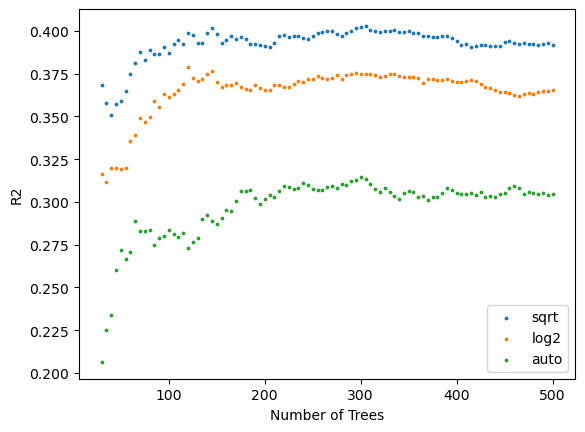

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(df_tree_cv['trees_sqrt'])
y = np.array(df_tree_cv['r2_sqrt'])
plt.scatter(x, y, s= 3)

x = np.array(df_tree_cv['trees_log2'])
y = np.array(df_tree_cv['r2_log2'])
plt.scatter(x, y, s= 3)

x = np.array(df_tree_cv['trees_auto'])
y = np.array(df_tree_cv['r2_auto'])
plt.scatter(x, y, s= 3)

plt.xlabel('Number of Trees')
plt.ylabel('R2')
plt.legend(['sqrt', 'log2', 'auto'])

plt.show()

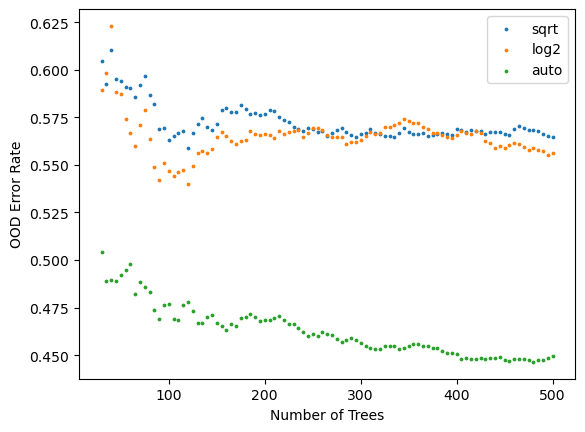

In [15]:
x = np.array(df_max_feature['trees_sqrt'])
y = np.array(df_max_feature['error_sqrt'])
plt.scatter(x, y, s= 3)

x = np.array(df_max_feature['trees_log2'])
y = np.array(df_max_feature['error_log2'])
plt.scatter(x, y, s= 3)

x = np.array(df_max_feature['trees_auto'])
y = np.array(df_max_feature['error_auto'])
plt.scatter(x, y, s= 3)

plt.xlabel('Number of Trees')
plt.ylabel('OOD Error Rate')

plt.legend(['sqrt', 'log2', 'auto'])

plt.show()

In [16]:
# Tuning: depth of trees

# from collections import OrderedDict

# # Map a classifier name to a list of (<max_depth>, <error rate>) pairs.
# error_rate = OrderedDict((label, []) for label, _ in ensemble_regs)
# cv_r2 = OrderedDict((label, []) for label, _ in ensemble_regs)

# # Range of `max_depth` values to explore.
# min_depths = 5
# max_depths = 50

# for label, reg in ensemble_regs:
#     for i in range(min_depths, max_depths + 1, 5):
#         reg.set_params(max_depth=i)
#         reg.fit(x_train, y_train)

#         # Record the OOB error for each `n_estimators=i` setting.
#         oob_error = 1 - reg.oob_score_
#         error_rate[label].append((i, oob_error))
        
#         # Record CV
#         reg_cv = cross_val_score(reg, x_train, y_train, cv= k_fold, scoring= 'r2')
#         cv_r2[label].append((i, reg_cv.mean()))


# # Collect tuning results
# df_depth = pd.concat([pd.DataFrame(error_rate['RandomForestRegressor, max_features= Sqrt'], columns=['depth_sqrt', 'error_sqrt']), pd.DataFrame(error_rate['RandomForestRegressor, max_features= log2'], columns=['depth_log2', 'error_log2']), pd.DataFrame(error_rate['RandomForestRegressor, max_features= Auto'], columns= ['depth_auto', 'error_auto'])], axis= 1)
# df_depth_cv = pd.concat([pd.DataFrame(cv_r2['RandomForestRegressor, max_features= Sqrt'], columns=['depth_sqrt', 'r2_sqrt']), pd.DataFrame(cv_r2['RandomForestRegressor, max_features= log2'], columns=['depth_log2', 'r2_log2']), pd.DataFrame(cv_r2['RandomForestRegressor, max_features= Auto'], columns= ['depth_auto', 'r2_auto'])], axis= 1)

# df_depth.to_csv(f'result_depth_{target}.csv')
# df_depth_cv.to_csv(f'result_depth_cv_{target}.csv')

In [17]:
# Load the previous results for saving time

df_depth = pd.read_csv(f'result_depth_{target}.csv')
df_depth_cv = pd.read_csv(f'result_depth_cv_{target}.csv')

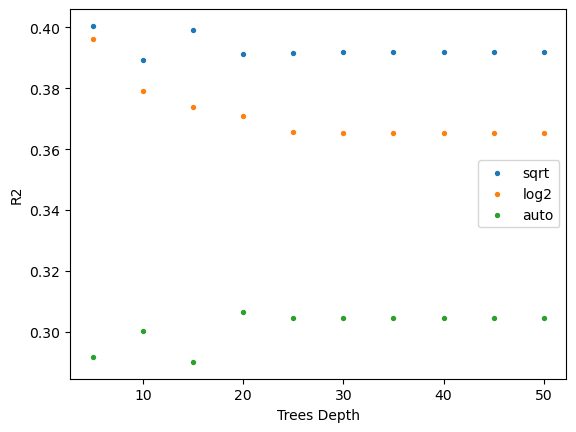

In [18]:
x = np.array(df_depth_cv['depth_sqrt'])
y = np.array(df_depth_cv['r2_sqrt'])
plt.scatter(x, y, s= 8)

x = np.array(df_depth_cv['depth_log2'])
y = np.array(df_depth_cv['r2_log2'])
plt.scatter(x, y, s= 8)

x = np.array(df_depth_cv['depth_auto'])
y = np.array(df_depth_cv['r2_auto'])
plt.scatter(x, y, s= 8)

plt.xlabel('Trees Depth')
plt.ylabel('R2')
plt.legend(['sqrt', 'log2', 'auto'])

plt.show()

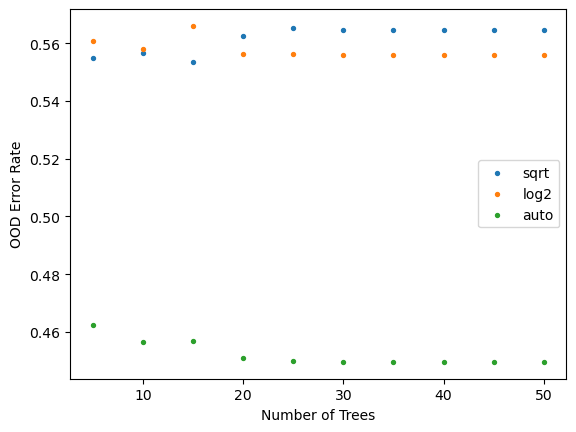

In [19]:
x = np.array(df_depth['depth_sqrt'])
y = np.array(df_depth['error_sqrt'])
plt.scatter(x, y, s= 8)

x = np.array(df_depth['depth_log2'])
y = np.array(df_depth['error_log2'])
plt.scatter(x, y, s= 8)

x = np.array(df_depth['depth_auto'])
y = np.array(df_depth['error_auto'])
plt.scatter(x, y, s= 8)

plt.xlabel('Number of Trees')
plt.ylabel('OOD Error Rate')

plt.legend(['sqrt', 'log2', 'auto'])

plt.show()

# Result

## Choosing the final parameter



In [28]:
# Change the tree number, depth, and maximum feature method here
tree_number = 410
tree_depth = 20
max_feature_method = None
# 'sqrt', 'log2', and None for auto

In [29]:
# Input parameters for training
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.ensemble import RandomForestRegressor

f_regmodel = RandomForestRegressor(
    n_estimators= tree_number,  # Trees
    random_state= random_state, 
    criterion='squared_error', 
    max_depth= tree_depth, # Depth
    max_features= max_feature_method,
    oob_score= True,
    )

# standardlize
if standardization is True:
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

reg = f_regmodel.fit(x_train, y_train)

predict_list = list(reg.predict(x_train))
y_train_list = list(y_train)

predict_test_list = list(reg.predict(x_test))
y_test_list = list(y_test)


print('Training data validation:\nR2: {} \nRMSE: {} \nMAE: {}\n'.format(r2_score(y_train_list, predict_list), mean_squared_error(y_train_list, predict_list, squared=False), mean_absolute_error(y_train_list, predict_list)))
print('Test data validation:\nR2: {} \nRMSE: {} \nMAE: {}'.format(r2_score(y_test_list, predict_test_list), mean_squared_error(y_test_list, predict_test_list, squared=False), mean_absolute_error(y_test_list, predict_test_list)))

Training data validation:
R2: 0.9326989583526447 
RMSE: 50.56061544763001 
MAE: 22.627495455229653

Test data validation:
R2: 0.22742910826331464 
RMSE: 276.70899666452857 
MAE: 102.67514725651985


/Users/ansel/micromamba/envs/geopython2023/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/ansel/micromamba/envs/geopython2023/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


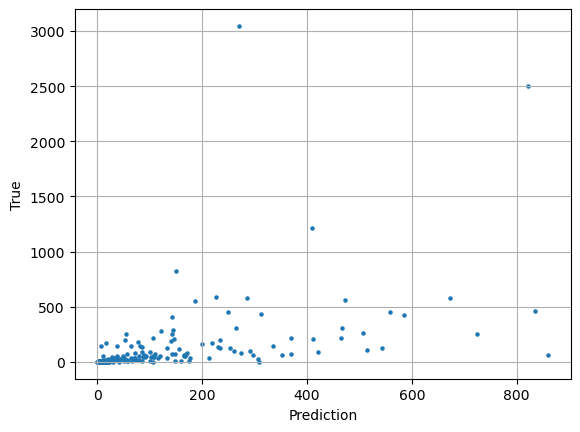

In [30]:
plt.scatter(predict_test_list, y_test_list, s= 5)

plt.xlabel('Prediction')
plt.ylabel('True')
plt.grid()

plt.show()

## Important Factors

In [31]:
import numpy as np

importances = reg.feature_importances_
forest_importances = pd.Series(importances, index=x_columns).sort_values(ascending=True).tail(20)


# fig, ax = plt.subplots()
# fig.set_size_inches(10, 5)
# forest_importances.plot.barh(ax = ax)
# ax.set_title("Feature importances for {} prediction".format(y_name))
# ax.set_xlabel("Mean decrease in impurity")

# fig.tight_layout()

In [32]:
df_forest_importance = pd.DataFrame(forest_importances)
df_forest_importance['Factor'] = df_forest_importance.index

df_forest_importance.columns = ['Score', 'Factor']
df_forest_importance = df_forest_importance.sort_values(by= 'Score', ascending= False)

In [33]:
df_forest_importance.to_csv(f'result_importance_{target}_{tree_number}_{tree_depth}_{max_feature_method}.csv', index= False)
df_forest_importance

,Score,Factor
commercial_poi,0.541470,commercial_poi
trail,0.036021,trail
X,0.032429,X
age_60-69,0.029485,age_60-69
public_poi,0.027129,public_poi
green_area_m2,0.021884,green_area_m2
neighborhood_level,0.021202,neighborhood_level
housing_buld_age_1946-1990,0.020850,housing_buld_age_1946-1990
industrial_commercial_m2,0.018353,industrial_commercial_m2
housing_Renter,0.018116,housing_Renter


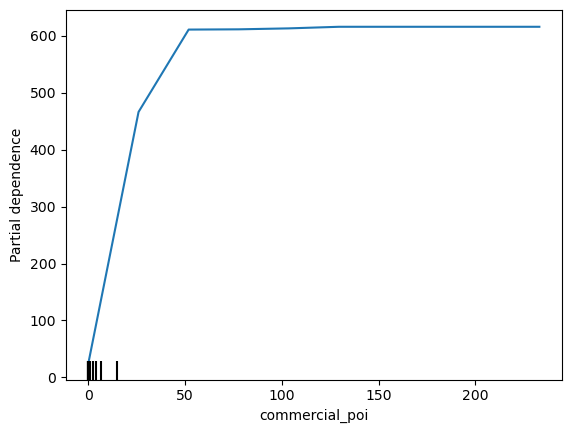

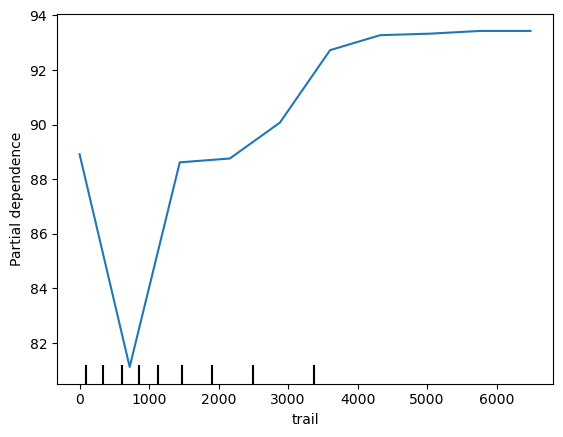

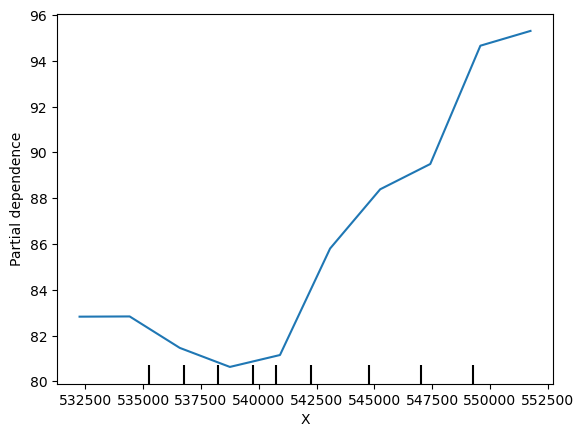

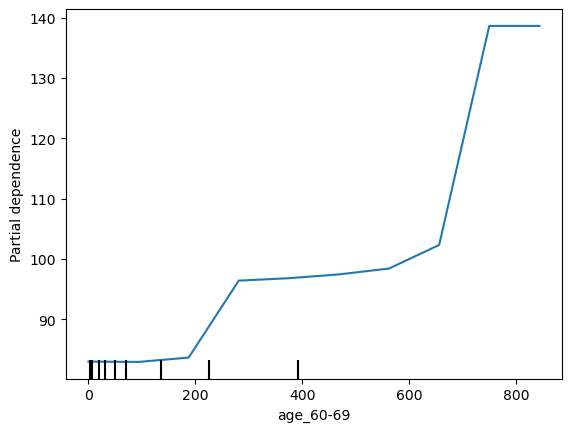

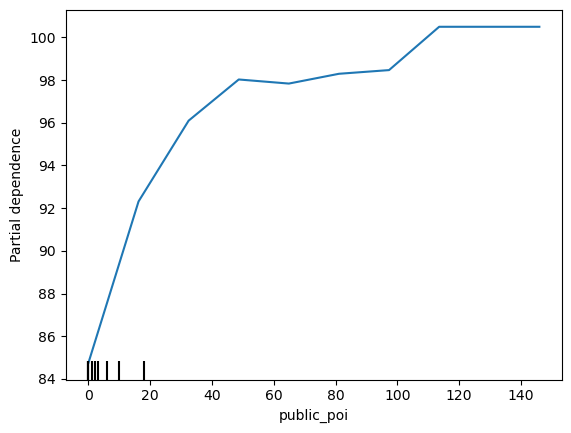

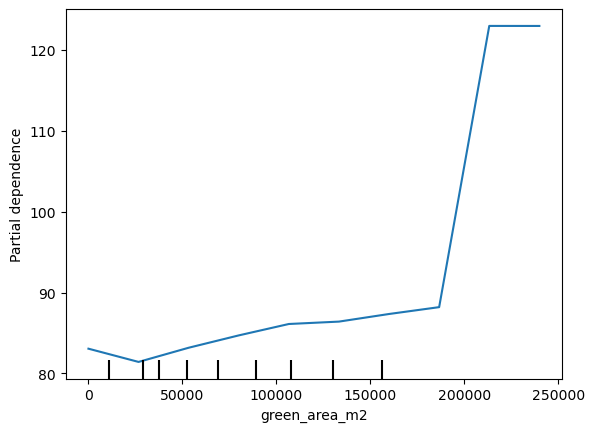

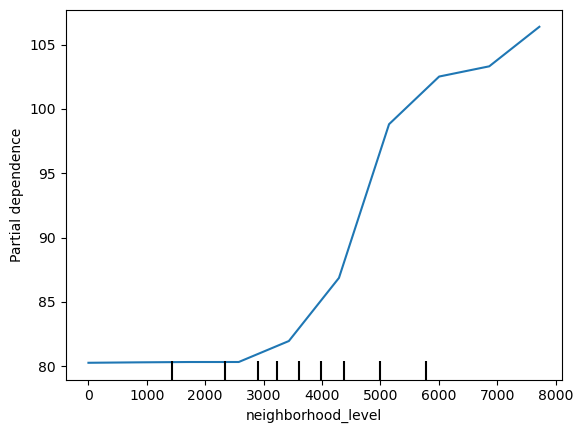

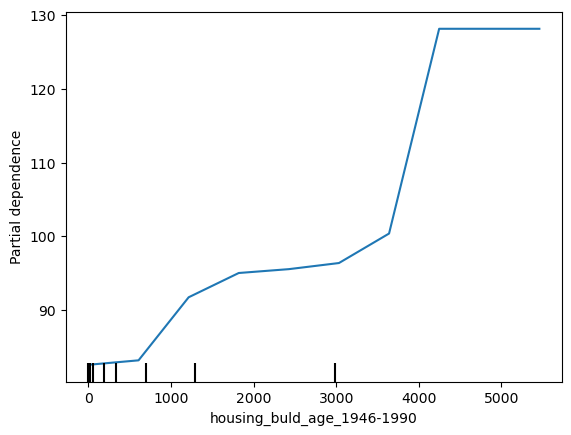

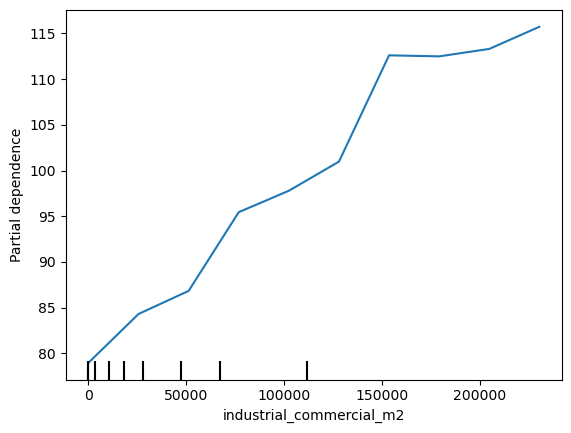

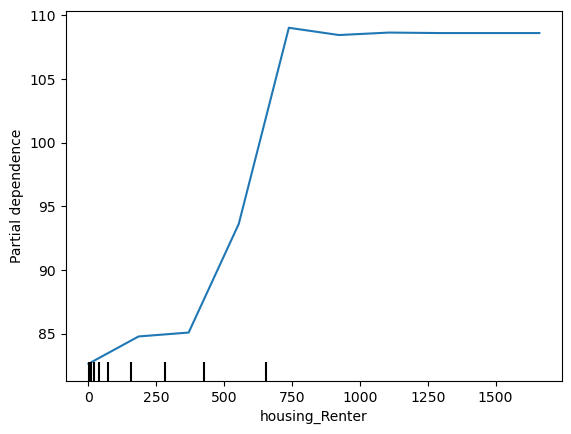

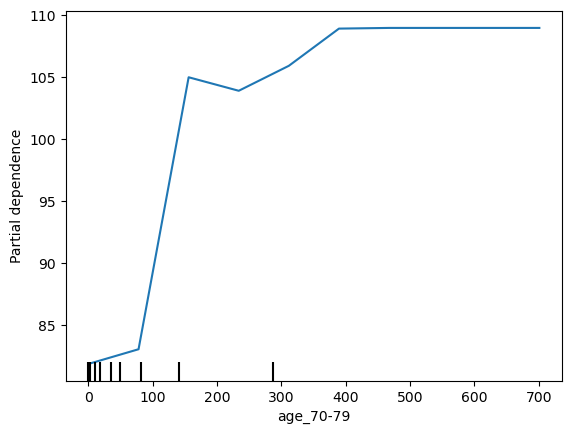

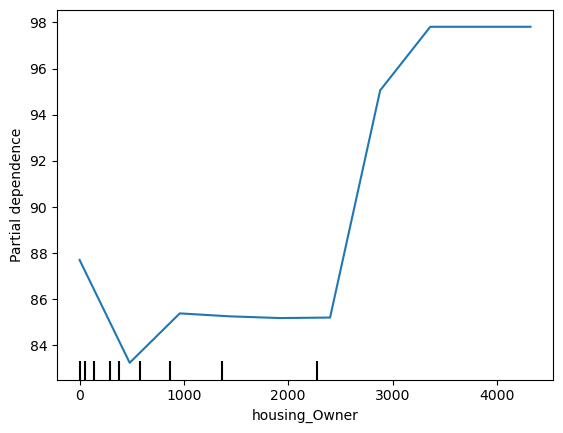

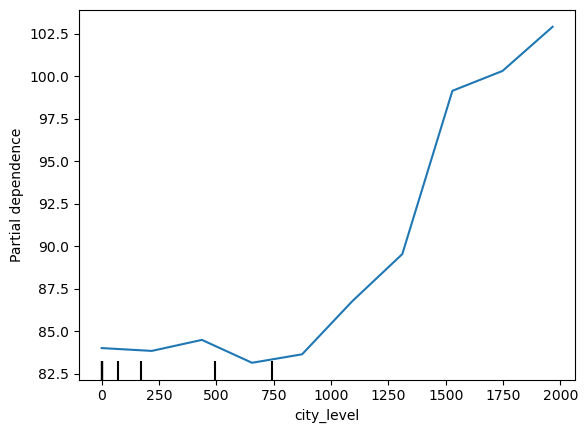

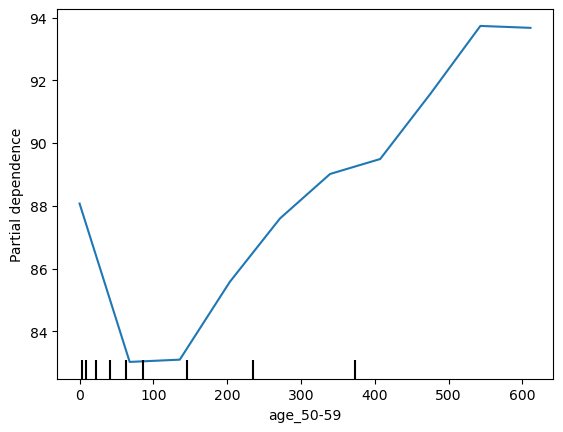

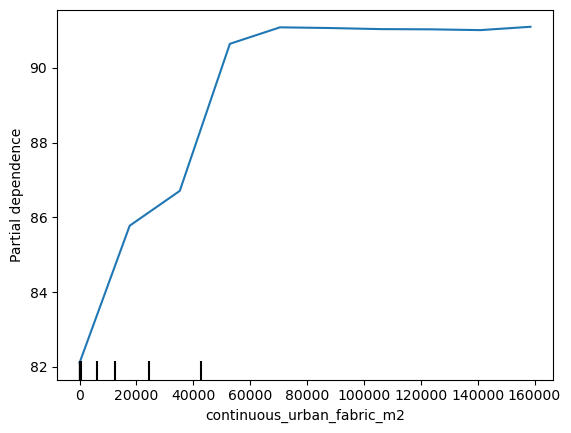

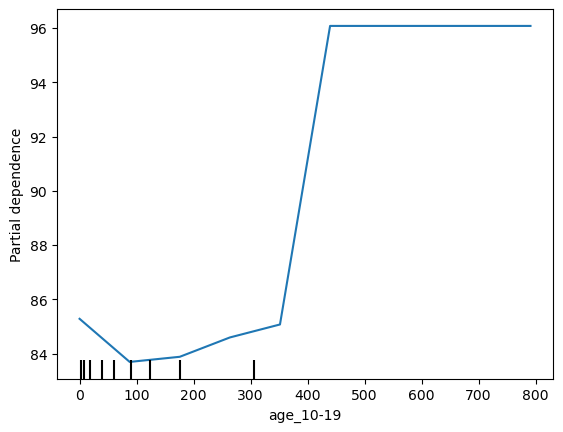

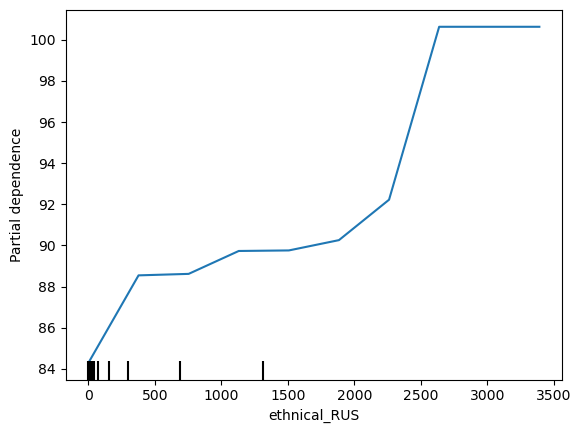

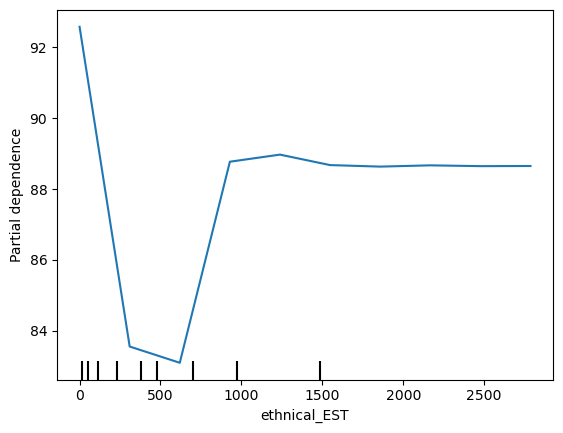

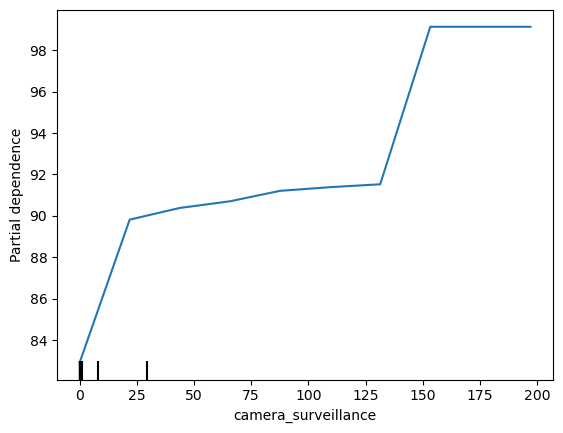

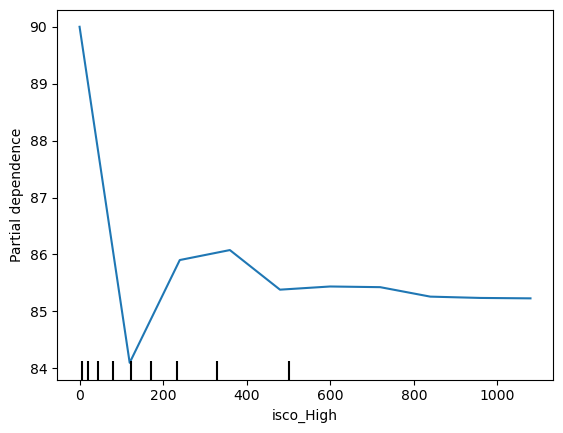

In [34]:
from sklearn.inspection import PartialDependenceDisplay

for pdp in df_forest_importance['Factor']:
    PartialDependenceDisplay.from_estimator(
        reg,
        x_test,
        features=[pdp],
        feature_names=x_columns,
        centered=False,
        kind="average",
        percentiles=(0, 1),
        grid_resolution=10,
    )

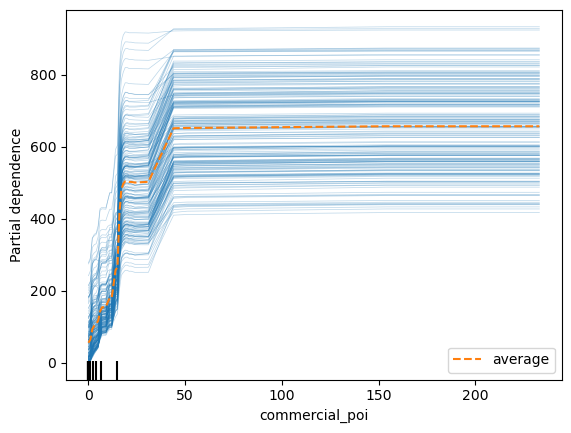

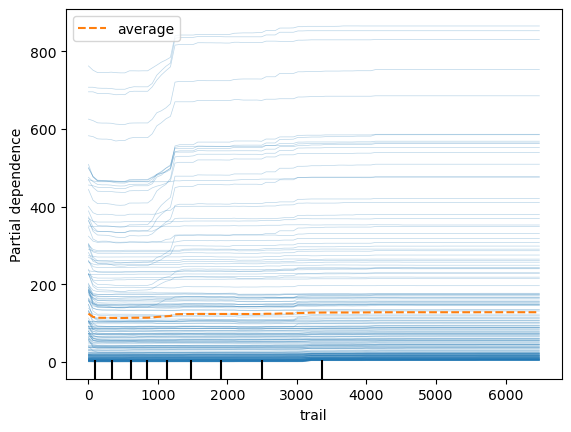

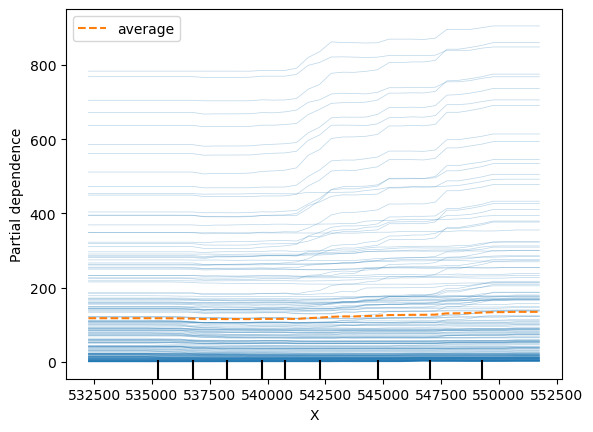

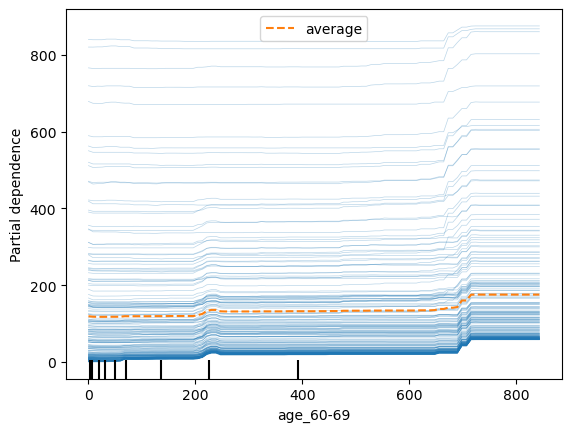

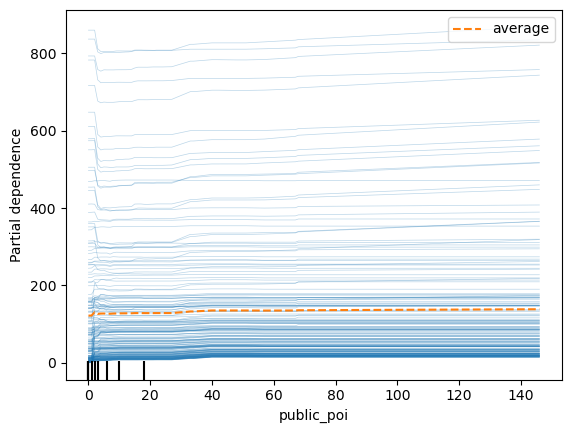

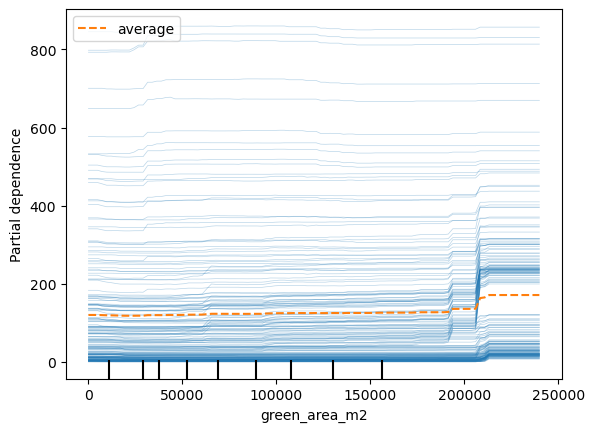

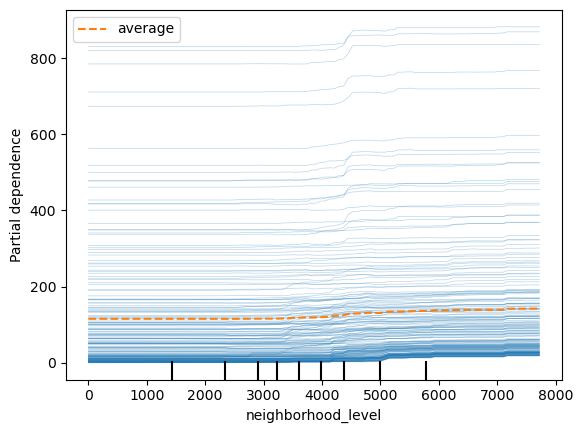

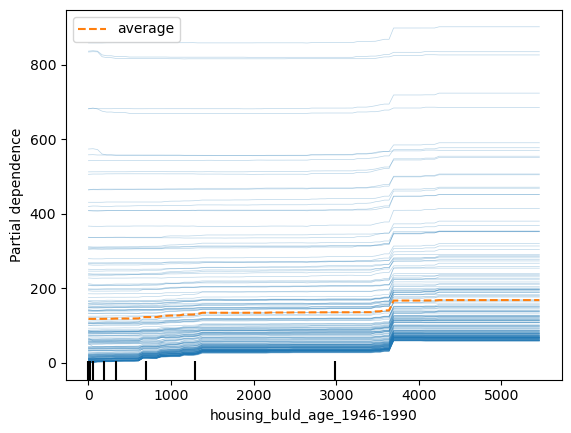

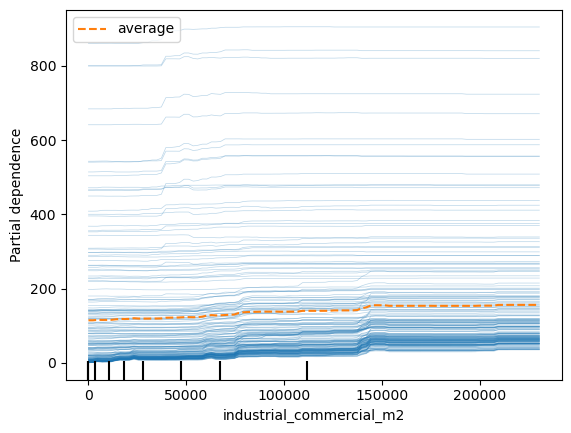

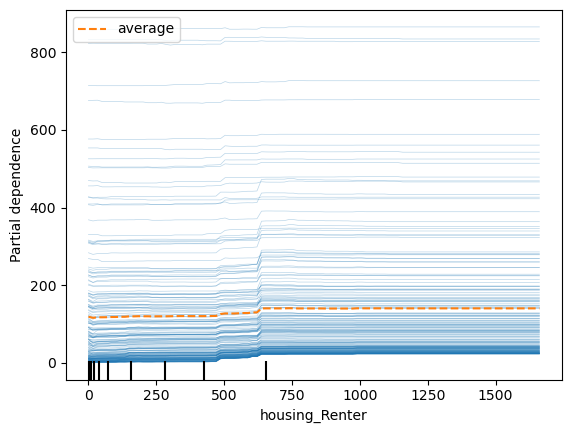

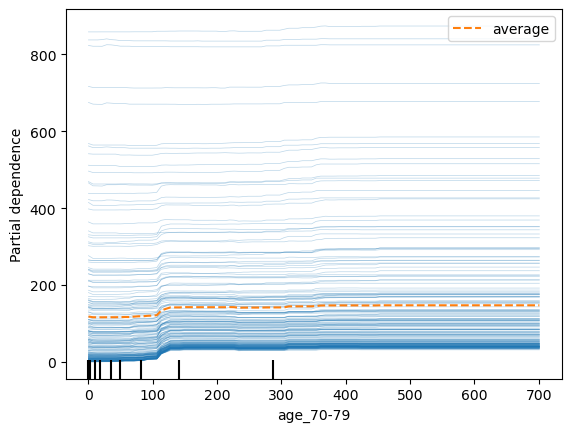

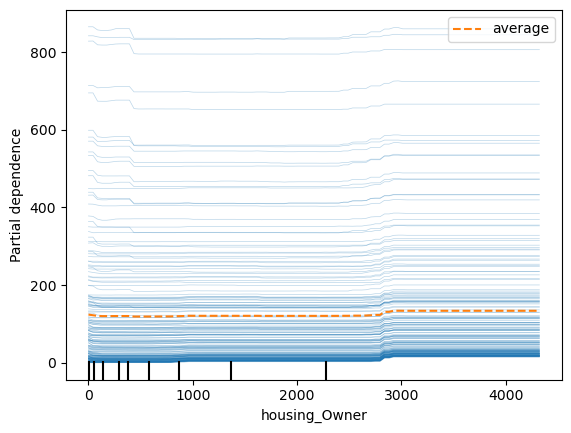

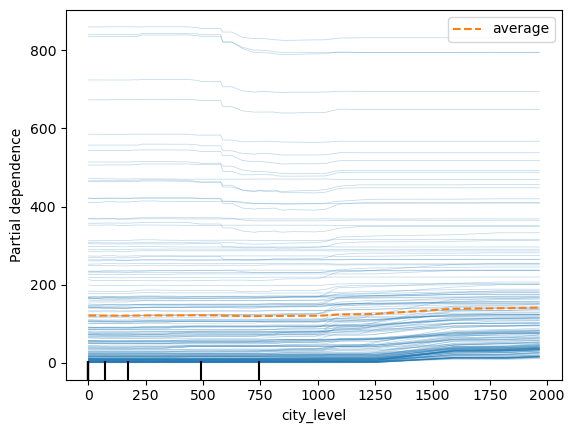

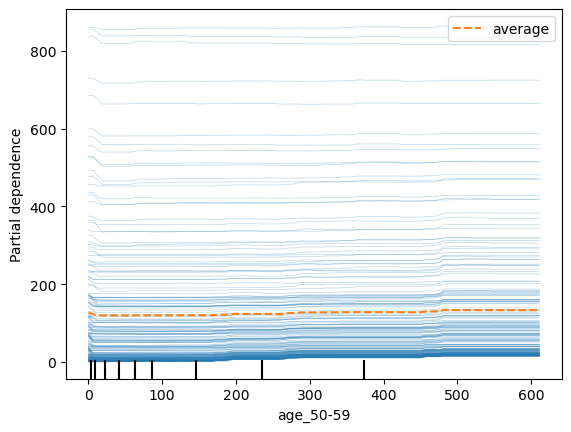

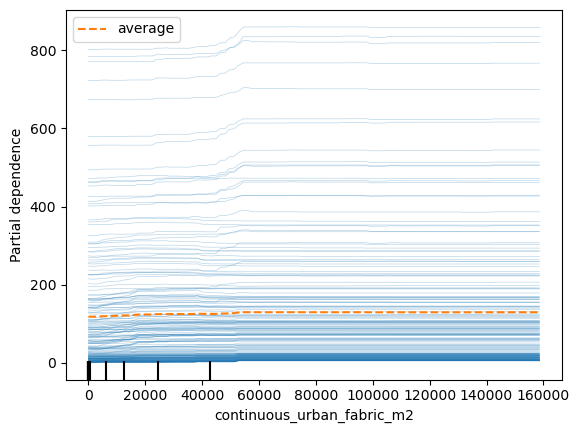

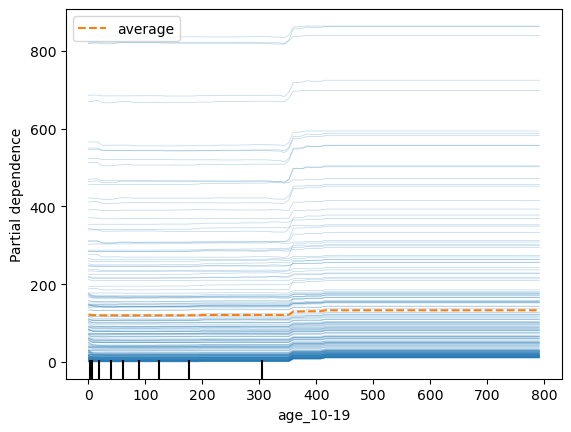

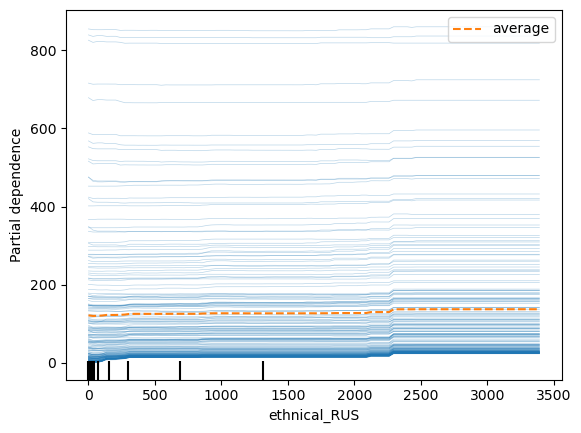

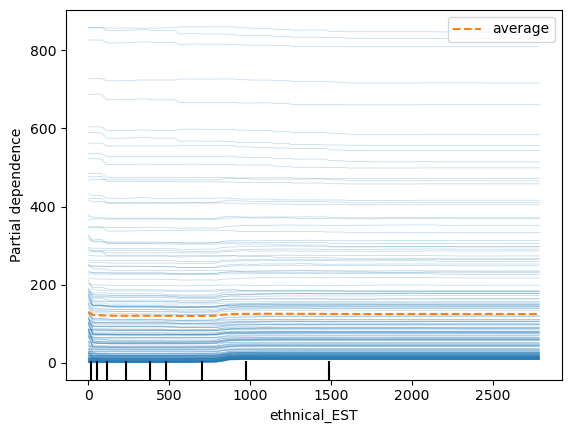

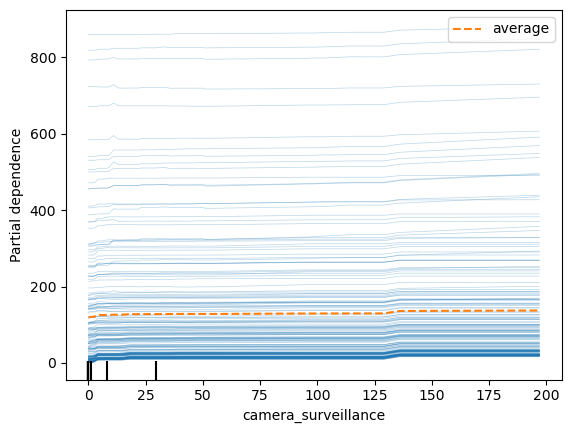

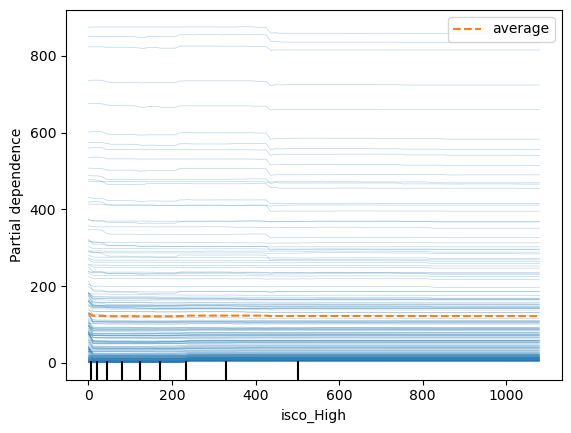

In [35]:
for pdp in df_forest_importance['Factor']:
    PartialDependenceDisplay.from_estimator(
        reg,
        x_test,
        features=[pdp],
        feature_names=x_columns,
        centered=False,
        kind="both",
        percentiles=(0, 1),
        grid_resolution=100,
        
    )